In [912]:
# import numpy as np
# import random


# class GradientDescent():
    
#     """Descent gradient class with regularize technique
    
#     Parameters
#     ----------
#     regularize : bool
#         If True, the regularization is used.
#     bias : bool
#         If the True, a bias is added to the features.
#     alpha : float > 0
#         Coefficient for the step when updating the parameters.
    
#     Notes
#     -----
#     This class aims at computing the parameters of a linear model using
#     a descent gradient method with or without regularization.
#     """
    
#     def __init__(self, regularize=False, bias=True, alpha=3e-9, iterations=30000):
#         self.bias = bias
#         if alpha < 0:
#             raise ValueError('Alpha parameter must be > 0. Here {}.'.format(alpha))
#         self.alpha = alpha
#         self.iterations = iterations
#         self.regularize = regularize
        
#         #set the epsilon value depending on the regularize case
#         if regularize:
#             self.epsilon = 1e-10
#         else:
#             self.epsilon = 1e-8
    
#     def predict(self, new_features):
#         """Make predictions using the result of the gradient descent
        
#         Parameters
#         ----------
#         new_features : 2d sequence of float
#             The feature for which to predict the labels.
            
#         Returns
#         -------
#         predicted_labels : 2d sequence of float
#             The predicted labels
        
#         Notes
#         -----
#         The method fit must be called first.
#         """
        
#         if self.bias:
#             new_features = self._add_bias(new_features)
#         return self.hypothesis(new_features, self.parameters_)
    
    
#     def fit(self, features, label, parameters=None):
#         """Find the optimal parameters
        
#         Parameters
#         ----------
#         features : 2d sequence of float
#             The input parameters.
#         label : 2d sequence of float
#             The output parameters
#         parameters : 2d sequence of float
#             The initial guess for the descent gradient.
#         """
#         # add bias or not
#         if self.bias:
#             features = self._add_bias(features)
        
#         # if no initial parameters are given get some randomly
#         if parameters is None:
#             n = features.shape[1]
#             parameters = np.random.rand(n,1)
    
#         # compute the initial prediction
#         predictions = self.hypothesis(features, parameters)
        
#         # solve depending of the regularization or not
#         self.parameters_ = self._regularize_fit(features, label, parameters, predictions)

    
#     def _regularize_fit(self, features, label, parameters, predictions):
#         """Find the optimal parameters with regularized method
#         """

#         m = features.shape[0]
        
#         lmb1 = 0.2
#         if self.regularize == False:
#             lmb1 = 0
#         lmb2 = 0
        
#         if self.regularize == 'rigde':
#             lmb2 = 0
#         if self.regularize == 'lasso':
#             lmb2 = 1
#         if self.regularize == 'elastic-net':
#             lmb2 = 0.4
#         print('lambda 1 est ',lmb1)
#         print('lambda 2 est ',lmb2)
        
        
#         costFct = 0
#         costFctEvol = []
#         count = 0
#         while self.testRegCostFct(predictions, label, lmb1, lmb2, parameters, costFct, self.epsilon):
#             count += 1
#             costFct = self.regCostFunction(predictions, label, lmb1, lmb2, parameters)
#             grads = self.regGradients(predictions, label, features, lmb1, lmb2, parameters)
#             parameters = self.updateParameters(parameters, grads, self.alpha)
#             predictions = self.hypothesis(features, parameters)
#             costFctEvol.append(costFct)
            
#         plt.xlabel('Iterations')
#         plt.ylabel('Fonction cout')
#         plt.title('Evolution de la fonction cout en fonctions des iterations')
#         plt.plot(costFctEvol)
#         return parameters
    
#     def _add_bias(self, features):
#         """Add bias column (1 vector)
#         """
#         bias = np.ones(features.shape[0])
#         return np.column_stack([features, bias])
        
#     def hypothesis(self, x, theta):
#         """Compute our hypothesis model (linear regression), use a fonction:
#         """
#         return np.dot(x, theta)
    
#     def costFunction(self, yhat, y):
#         """Fonction de coût
#         """
#         return np.square(yhat - y).sum() / (2*y.shape[0])
    
#     def regCostFunction(self, yhat, y, lmb1, lmb2, theta):
#         """Fonction de coût régularisée
#         """
#         #return self.costFunction(yhat, y) + lmb1/((2*y.shape[0]) * np.square(theta)).sum()


#         return self.costFunction(yhat, y) + lmb1*(((1-lmb2)/2) * np.square(theta).sum() + lmb2*(np.abs(theta)).sum())
    
#     def gradients(self, yhat, y, x):
#         """Dérivée de la fonction de coût == gradients
#         """
        
#         return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1)

#     def regGradients(self, yhat, y, x, lmb1 ,lmb2 , theta):
#         """Dérivée de la fonction de coût regularisée
#         """
#         #return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1) + lmb1/x.shape[0]*theta

#         return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1) + (lmb1*(1-lmb2))/x.shape[0]*theta
    
#     def updateParameters(self, parameters, grads, alpha):
#         """Gradient descent: mise à jour des paramètres
#         """
#         return parameters - alpha * grads
    
#     def testRegCostFct(self, yhat, y, lmb1, lmb2, theta, prevCostFct, epsilon):
#         """ Fonction pour tester l'évolution de la fonction de coût régularisée
            
#             Returns
#             -------
#             test : bool
#                 vrai = continuer la descente de gradient
#         """
#         return np.abs(self.regCostFunction(yhat, y, lmb1, lmb2, theta) - prevCostFct) >= epsilon*prevCostFct
    
#     def train_test_split(self, X, y, ratio=0.3, random_seed = 42):
#         """ Fonction pour subdiviser les donnees en donnees d'entrainement et donnees de test.
        
#              Parametres
#             ----------
#             X : 2d sequence of float
#                 The input parameters.
#             y : 2d sequence of float
#                 The output parameters
#             ratio : La ratio du test set.
            
#             Returns
#             -------
#             X_train : les features d'entrainement.
#             y_train : les labels d'entrainement.
#             X_test : les features de test.
#             y_test : les labels de test.
            
#         """
#         X_train = []
#         y_train = []
#         X_test = []
#         y_test = []
#         rows = len(X)
#         random.seed(random_seed)
#         test_index = random.sample(range(0,rows), int(rows*ratio))
#         for i in range(rows):
#             if i in test_index:
#                 X_test.append(X[i])
#                 y_test.append(y[i])
#             else:
#                 X_train.append(X[i])
#                 y_train.append(y[i])
#         return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    
#     def mae(self, y, y_pred) :
#         return np.abs(y_pred - y).sum() / (2*y.shape[0])
    
#     def rmse(self, y, y_pred) :
#         return np.sqrt(np.square(y_pred - y).sum() / (2*y.shape[0]))
    
#     def r2_score(self, y, y_pred) :
#         return 1 - (np.square(y_pred - y).sum() / np.square(y_pred - np.mean(y)).sum())
        

In [1391]:
import numpy as np
import random


class GradientDescent():
    
    """Ce module permet d'implementer une descente de gradient.
    
    Parametres
    ----------
    regularize : valeur possible (False, rigde, lasso, elasticNet)
        False : effectue une descente de gradient classique sans regularisation.
        rigde : effectue une descente de gradient avec regularisation Rigde.
        lasso : effectue une descente de gradient avec regularisation Lasso.
        elasticNet : permet d'effectuer une descente de gradient avec regularisation ElasticNet.
    bias : bool
        Si True, ajoute le biais sur les features.
    learning_rate : float > 0
        contitue le pas lors de la mise a jour des parametres.
    
    Notes
    -----
    Cette classe vise à calculer les paramètres d'un modèle linéaire en utilisant
    une méthode de descente de gradient avec ou sans régularisation..
    """
    
    def __init__(self, regularize=False, bias=True, learning_rate=3e-9, normalize = False):
        self.bias = bias
        if learning_rate < 0:
            raise ValueError('learning_rate parameter must be > 0. Here {}.'.format(learning_rate))
        self.learning_rate = learning_rate
        self.regularize = regularize
        self.lamda = 0
        self.alpha = 0
        self.normalize = normalize
        
        
        if self.regularize:    
            self.epsilon = 1e-10
            if self.regularize == 'rigde':
                self.alpha = 0
            elif self.regularize == 'lasso':
                self.alpha = 1
            elif self.regularize == 'elasticNet':
                self.alpha = 0.4
            else :
                raise ValueError("le parametre 'regularize' ne peut prendre que : 'False', 'ridge', 'lasso', 'elasticNet'")
        else:
            self.epsilon = 1e-8
            self.lamda = 0
            self.alpha = 0
    
    def predict(self, new_features):
        """Faire des prédictions en utilisant le résultat de la descente de gradient.
        
        Paramètres
        ----------
        new_features : matrice de flottants.
            La caractéristique pour laquelle il faut prédire les étiquettes.
            
        Return
        -------
        predicted_labels : matrice de flottants.
            les predictions du modele
        
        Notes
        -----
        La méthode fit doit être appelée en premier.
        """
        
        if self.bias:
            new_features = self._add_bias(new_features)
        return self.hypothesis(new_features, self.parameters_)
    
    
    def fit(self, features, label, parameters=None):
        """Find the optimal parameters
        
        Parametres
        ----------
        features : matrice de flottants.
            Les donnees d'entrainements.
        label : matrice de flottants ou vecteur.
            Le etiquettes des donnees d'entrainements.
        parameters : matrice de flottants ou vecteur.
            Les parametres du modele.
        """
        
        if self.normalize:
            features = self.standardScaler(features)
        # add bias or not
        if self.bias:
            features = self._add_bias(features)
        
        # if no initial parameters are given get some randomly
        if parameters is None:
            n = features.shape[1]
            parameters = np.random.rand(n,1)
    
        # compute the initial prediction
        predictions = self.hypothesis(features, parameters)
        
        # solve depending of the regularization or not
        self.parameters_ = self._fit(features, label, parameters, predictions)

    
    def _fit(self, features, label, parameters, predictions):
        """Trouver les paramètres optimaux
        """

        m = features.shape[0]

        
        
        costFct = 0
        costFctEvol = []
        count = 0
        while self.testCostFct(predictions, label, self.lamda, self.alpha, parameters, costFct, self.epsilon):
            count += 1
            costFct = self.costFunction(predictions, label, self.lamda, self.alpha, parameters)
            grads = self.gradients(predictions, label, features, self.lamda, self.alpha, parameters)
            parameters = self.updateParameters(parameters, grads, self.learning_rate)
            predictions = self.hypothesis(features, parameters)
            costFctEvol.append(costFct)
            
        plt.xlabel('Iterations')
        plt.ylabel('Fonction cout')
        plt.title('Evolution de la fonction cout en fonctions des iterations')
        plt.plot(costFctEvol)
        return parameters
    
    def _add_bias(self, features):
        """Ajouter une colonne de bias (1 vecteur)
        """
        bias = np.ones(features.shape[0])
        return np.column_stack([features, bias])
        
    def hypothesis(self, x, theta):
        """Calculer notre modèle d'hypothèse (régression linéaire), utiliser une fonction :
        """
        return np.dot(x, theta)
    
    def _costFunction(self, yhat, y):
        """Fonction de coût
        """
        return np.square(yhat - y).sum() / (2*y.shape[0])
    def costFunction(self, yhat, y, lamda, alpha, theta):
        """Fonction de coût avec ou sans régularisée selon les parametres.
        """
        return self._costFunction(yhat, y) + lamda*(((1-alpha)/2) * np.square(theta).sum() + alpha*(np.abs(theta)).sum())
    


    def gradients(self, yhat, y, x, lamda ,alpha , theta):
        """Dérivée de la fonction de coût
        """

        return (((yhat - y) * x).sum(axis=0) / x.shape[0]).reshape(x.shape[1],1) + (lamda*(1-alpha))/x.shape[0]*theta
    
    def updateParameters(self, parameters, grads, learning_rate):
        """Gradient descent: mise à jour des paramètres
        """
        return parameters - learning_rate * grads
    
    def testCostFct(self, yhat, y, lamda, alpha, theta, prevCostFct, epsilon):
        """ Fonction pour tester l'évolution de la fonction de coût régularisée
            
            Returns
            -------
            test : bool
                vrai = continuer la descente de gradient
        """
        return np.abs(self.costFunction(yhat, y, lamda, alpha, theta) - prevCostFct) >= epsilon*prevCostFct
    
    def train_test_split(self, X, y, ratio=0.3, random_seed = 42):
        """ Fonction pour subdiviser les donnees en donnees d'entrainement et donnees de test.
        
             Parametres
            ----------
            X : matrice de flottants.
            Les donnees d'entrainements.
            
            y : matrice de flottants ou vecteur.
            Le etiquettes des donnees d'entrainements.
            
            ratio : La ratio du test set.
            
            Returns
            -------
            X_train : les features d'entrainement.
            y_train : les labels d'entrainement.
            X_test : les features de test.
            y_test : les labels de test.
            
        """
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        rows = len(X)
        random.seed(random_seed)
        test_index = random.sample(range(0,rows), int(rows*ratio))
        for i in range(rows):
            if i in test_index:
                X_test.append(X[i])
                y_test.append(y[i])
            else:
                X_train.append(X[i])
                y_train.append(y[i])
        return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    
    def mae(self, y, y_pred) :
        """ Fonction determiner le score Mean Absolute Error.
        
             Parametres
            ----------
            y : matrice de flottants ou vecteur.
                Le etiquettes des donnees d'entrainements.
            y_pred : matrice de flottants ou vecteur.
                    valeurs predites par le modele.
            
            
            Returns
            -------
            score : flottant.
                le score par la metric Mean Absolute Error.
            
        """
        return np.abs(y_pred - y).sum() / (2*y.shape[0])
    
    def rmse(self, y, y_pred) :
        
        """ Fonction determiner le score Root Mean Squared Error.
        
             Parametres
            ----------
            y : matrice de flottants ou vecteur.
                Le etiquettes des donnees d'entrainements.
            y_pred : matrice de flottants ou vecteur.
                    valeurs predites par le modele.
            
            
            Returns
            -------
            score : flottant.
                le score par la metric Root Mean Squared Error.
            
        """
        return np.sqrt(np.square(y_pred - y).sum() / (2*y.shape[0]))
    
    def r2_score(self, y, y_pred) :
        """ Fonction determiner le score Coefficient de determination R2.
        
             Parametres
            ----------
            y : matrice de flottants ou vecteur.
                Le etiquettes des donnees d'entrainements.
            y_pred : matrice de flottants ou vecteur.
                    valeurs predites par le modele.
            
            
            Returns
            -------
            score : flottant.
                le score par la metric Coefficient de determination R2.
            
        """
        return 1 - (np.square(y_pred - y).sum() / np.square(y_pred - np.mean(y)).sum())
    
    def standardScaler(self, X):
        
        """ Fonction determiner le score Coefficient de determination R2.
        
             Parametres
            ----------
            X : matrice de flottants.
                les donnees d'entrainements a normaliser.
            
            Returns
            -------
             X : matrice de flottants.
                les donnees normalisees ( centrees reduites ).
            
        """
        return np.array((X - X.mean(axis=0)) / (X.std(axis=0)))
                        
        

In [1396]:
g = GradientDescent(regularize = 'elasticNet',learning_rate = 0.03, normalize = False)

In [1397]:
import numpy as np 
import pandas as pd
np.random.seed(67)

In [1398]:
X = 3 * np.random.rand(100, 1) - 2
Y = 2*X + 7 + np.random.randn(100, 1)

In [1399]:
df  = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [1400]:
# X, Y = df.drop(['median_house_value','ocean_proximity'], axis = 1), df['median_house_value']
# X = X.to_numpy()
# Y = Y.to_numpy()

In [1401]:
# from sklearn.datasets import load_diabetes
# diabetes = load_diabetes()
# X = diabetes.data
# Y = diabetes.target

In [1402]:
X.shape

(100, 1)

In [1403]:
Y.shape

(100, 1)

In [1404]:
np.mean(A, axis = 0)

array([2.33333333, 1.66666667, 3.66666667])

In [1405]:
np.std(A, axis = 0)

array([0.47140452, 0.94280904, 2.3570226 ])

In [1406]:
len(np.mean(X, axis = 0))

1

In [1407]:
A = np.array([[2 , 1 , 2]
             ,[3 , 3 , 2]
             ,[2 , 1 , 7]])

In [1408]:
(A - np.mean(A, axis = 0)) /np.std(A, axis = 0)

array([[-0.70710678, -0.70710678, -0.70710678],
       [ 1.41421356,  1.41421356, -0.70710678],
       [-0.70710678, -0.70710678,  1.41421356]])

In [1409]:
Y = Y.reshape(-1,1)
Y.shape

(100, 1)

In [1410]:
(X - np.mean(X, axis = 0))/ np.std(X, axis = 0)

array([[ 0.26595136],
       [ 1.33222027],
       [ 0.74300906],
       [-0.46393548],
       [-1.38913462],
       [-0.27764483],
       [-0.86741437],
       [ 1.58311307],
       [ 0.86879847],
       [-1.43376941],
       [ 1.20431862],
       [ 0.42271437],
       [-0.73482568],
       [-0.52019516],
       [-0.9536405 ],
       [-0.40013725],
       [-0.71720936],
       [-1.55565995],
       [-0.19823558],
       [-0.18915391],
       [-1.44639592],
       [ 1.65976783],
       [-0.23881181],
       [ 0.2107889 ],
       [-0.80043112],
       [-0.54224148],
       [ 0.2868213 ],
       [ 0.8199394 ],
       [ 1.65437103],
       [ 0.45696832],
       [-0.22322926],
       [-0.38443204],
       [ 1.17997076],
       [-0.57958784],
       [ 0.26173709],
       [ 1.68727038],
       [-0.96877427],
       [ 0.88644115],
       [ 0.90430078],
       [-1.43634247],
       [ 1.70942721],
       [-0.33124435],
       [ 0.81472263],
       [-0.66036117],
       [-0.74513543],
       [-0

In [1411]:
len(np.std(X, axis = 0))

1

In [1412]:
X_train, y_train, X_test, y_test = g.train_test_split(X,Y,ratio=0.3,random_seed=44)

In [1413]:
X_train.shape

(70, 1)

In [1414]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Labels')

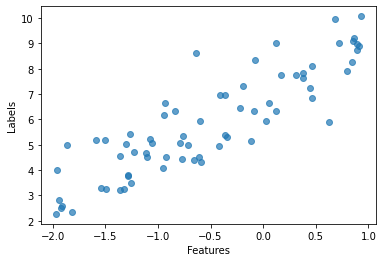

In [1415]:
plt.figure()
plt.scatter(X_train,y_train,alpha = 0.7)
plt.xlabel('Features')
plt.ylabel('Labels')

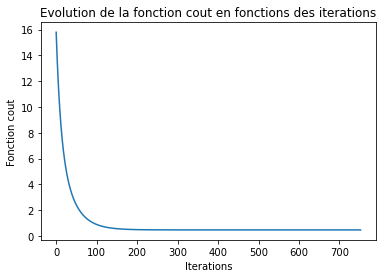

In [1416]:
g.fit(X_train,y_train)


In [1417]:
slope , intercept = g.parameters_[0][0],  g.parameters_[1][0]

In [1418]:
g.parameters_

array([[2.02414522],
       [6.9364598 ]])

In [1419]:
slope

2.024145215818432

Text(0, 0.5, 'Labels')

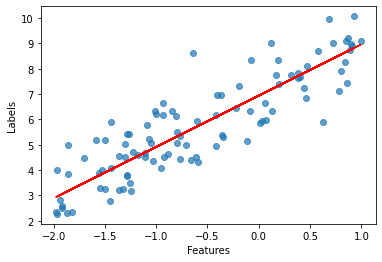

In [1420]:
plt.figure()
plt.scatter(X,Y,alpha = 0.7)
plt.plot(X,X*slope+intercept, color = 'red')
plt.xlabel('Features')
plt.ylabel('Labels')

In [1421]:
y_pred = g.predict(X_test)

In [1422]:
g.r2_score(y_pred, y_test)

0.7513418353529336

In [1423]:
y_test.shape

(30, 1)

In [1298]:
y_pred.shape

(132, 1)